In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load breast cancer data
df = pd.read_csv('.\\Breast_Cancer.csv')
df = pd.DataFrame(df)

In [3]:
# Check if there are missing values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [4]:
print(df.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


The average age of women in this dataset is ~54 years old. Breast cancer patients tend to be in older age groups but it is not 
uncommon to see women with breast cancer in their late 30s or 40s as we see in this dataset.

Age Statistics
count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64


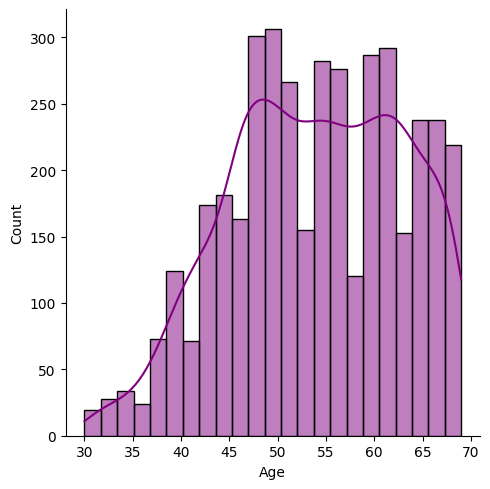

In [5]:
# Histogram of ages
sns.displot(data=df, x="Age", kind="hist", kde = True, color="purple")
print("Age Statistics")
print(df["Age"].describe())


<AxesSubplot: xlabel='Age'>

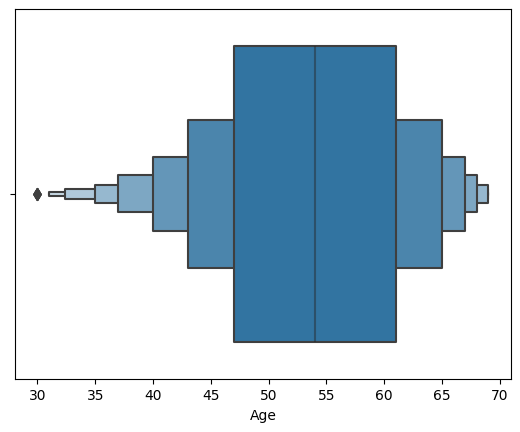

In [6]:
# Boxenplot of ages
sns.boxenplot(data=df, x="Age")

In [13]:
# initial subsetted dataframe by n-stage and status
df_status = df.groupby(by=["N Stage", "Status"])["Status"].count().unstack()
print(df_status)

Status   Alive  Dead
N Stage             
N1        2462   270
N2         655   165
N3         291   181


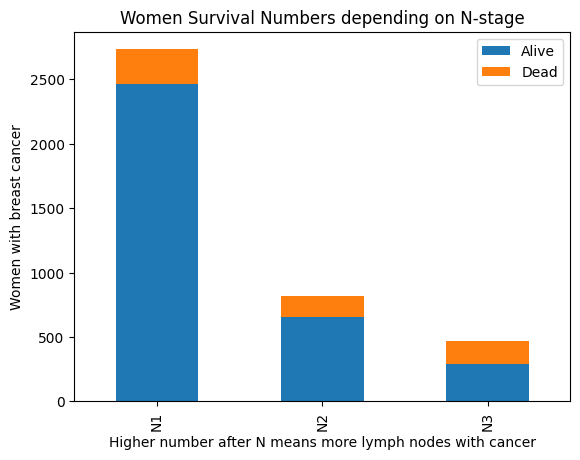

In [14]:
# build plot
# n_alive = [df_nstage_count[0], df_nstage_count[2], df_nstage_count[4]]
# n_dead = [df_nstage_count[1], df_nstage_count[3], df_nstage_count[5]]
labels = ['n1', 'n2', 'n3']
xlab = 'Higher number after N means more lymph nodes with cancer'
ylab = 'Women with breast cancer'


df_status.plot(kind="bar", stacked ='True')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend(['Alive', 'Dead'])
plt.title('Women Survival Numbers depending on N-stage')
plt.show()

We see that women that have more lymph nodes affected by cancer (Stage N3) are passing away at a greater rate compared
to those with less lymph nodes affected (Stage N2 and N1)

Status   percent_alive  percent_dead
N Stage                             
N1                90.1           9.9
N2                79.9          20.1
N3                61.7          38.3


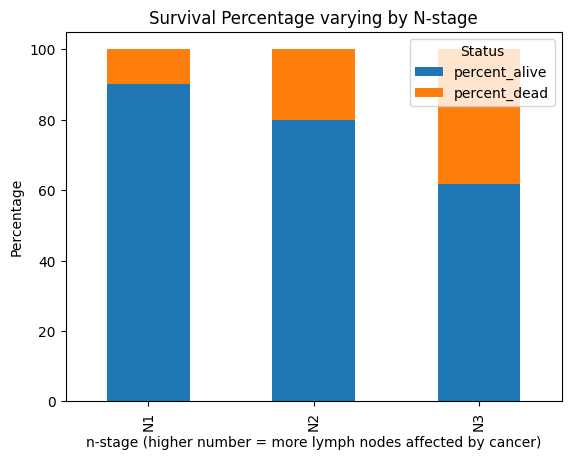

In [9]:
# Stacked Bar Percentage Visualization n-stage vs survival

df_status["percent_alive"] = round(df_status["Alive"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)
df_status["percent_dead"] = round(df_status["Dead"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)

print(df_status[["percent_alive", "percent_dead"]])
df_status[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  title = "Survival Percentage varying by N-stage")

plt.xlabel('n-stage (higher number = more lymph nodes affected by cancer)')
plt.ylabel('Percentage')
plt.show()

In [31]:
df_tstage = df.groupby(by=["T Stage ", "Status"])["Status"].count().unstack()
df_tstage["percent_alive"] = round(df_tstage["Alive"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_tstage["percent_dead"] = round(df_tstage["Dead"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)

The higher the T stage the bigger the tumor size. We see a negative relationship between tumor size and survival rate./.

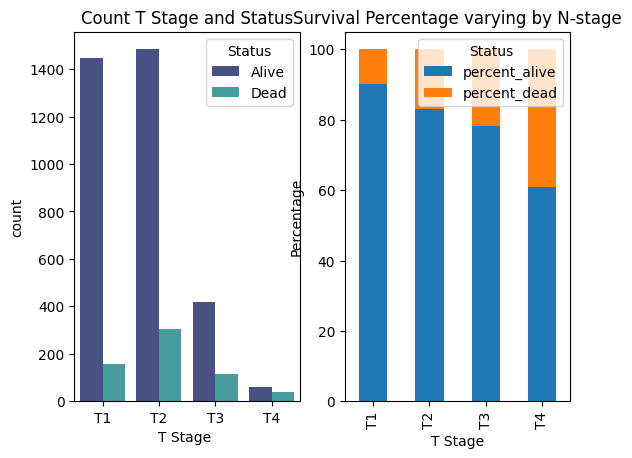

In [35]:
# intial t-stage dataframe calculations
df_tstage = df.groupby(by=["T Stage ", "Status"])["Status"].count().unstack()
df_tstage["percent_alive"] = round(df_tstage["Alive"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_tstage["percent_dead"] = round(df_tstage["Dead"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)

# countplot of t-stage 
f, axes = plt.subplots(1, 2)
sns.countplot(data=df, x="T Stage ", hue="Status", palette="mako", ax=axes[0]).set(title="Count T Stage and Status")

# percentage bar plot
df_tstage[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  ax=axes[1],
  title = "Survival Percentage varying by N-stage")

plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.show()

IIBB and IIB are earlier stages of breast cancer while IIA, IIAA and IIIC are later stages of breast cancer
where IIIC is the latest stage. IIIC patients have tumors spread to 10 or more lymph nodes. As expected a significant portion
of patients at the IIIC stage did not make it. The survival rate for IIB, IIIB is higher.

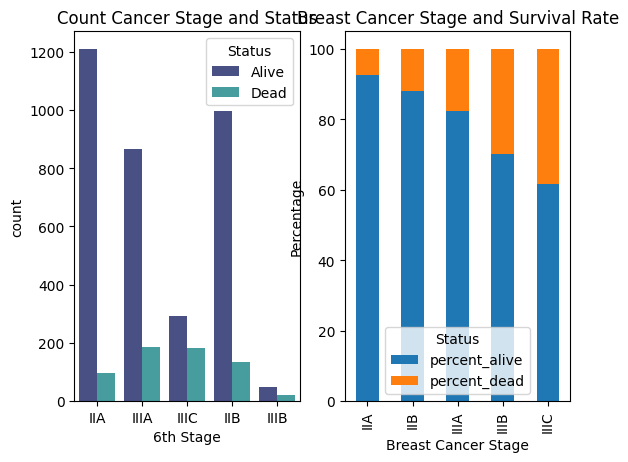

In [42]:
# intial 6-stage dataframe calculations
df_6stage = df.groupby(by=["6th Stage", "Status"])["Status"].count().unstack()
df_6stage["percent_alive"] = round(df_6stage["Alive"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_6stage["percent_dead"] = round(df_6stage["Dead"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)

f, axes = plt.subplots(1, 2)
sns.countplot(data=df, x="6th Stage", hue="Status", ax=axes[0], palette="mako").set(title="Count Cancer Stage and Status")

df_6stage[["percent_alive", "percent_dead"]].plot(
    kind="bar",
    ax=axes[1],
    title="Breast Cancer Stage and Survival Rate",
    stacked=True,
    xlabel="Breast Cancer Stage",
    ylabel="Percentage"
)
plt.show()